In [1]:
% of certainty

i want null / no sign / shape / type

must make CNN from scratch e.g. like program each layer

SyntaxError: invalid syntax (3809379743.py, line 3)

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 48px;"><strong>Assignment 2</strong></h1>
    <h2 style="color:#7D3C98;">Major Project</h2>
    <h2 style="color:#7D3C98;"><strong>COSC2673</strong> Machine Learning</h2>
    <h3 style="color:#D2B4DE; margin-top: 20px;">(Undergraduate Level)</h3>
    <h3 style="background: linear-gradient(to right, #7D3C98, #D7BDE2); -webkit-background-clip: text; color: solid;">By Oisin Aeonn & Vince Quach</em></h3>
    <h4 style="color:#BB8FCE;">Student IDs: s3952320 & s3900481</h4>
</div>

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">1.3 Python Library Imports</h1>

In [1]:
# Operating system interfaces
import os

# Data manipulation and analysis
import pandas as pd

# Model selection and evaluation
from sklearn.model_selection import train_test_split

# Image preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Building sequential models
from tensorflow.keras.models import Sequential

# Layers for building neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Plotting and visualization
import matplotlib.pyplot as plt

# Interactive and expressive visualizations
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Numerical computing
import numpy as np

# Statistical data visualization
import seaborn as sns

# Debug
print(os.environ['PATH'])

plt.style.use('dark_background')

# Building functional models
from tensorflow.keras.models import Model

# Additional layers for neural networks
from tensorflow.keras.layers import Dropout, Input


from PIL import Image

import imageio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

/opt/anaconda/bin:/opt/anaconda/condabin:/usr/local/sbin:/usr/local/bin:/usr/bin:/var/lib/flatpak/exports/bin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/var/lib/snapd/snap/bin
Num GPUs Available:  0


<h5 style="color:#D2B4DE; margin-top: 20px;">
    <ul>
        <li>First, let's cover all of the required imports for this entire Jupyter Notebook.</li><br>
        <li>I put them all here so that you can run most cells (especially EDA) out of order.</li><br>
        <li>This also conforms to the coding standard DO NOT REPEAT YOURSELF (DRY).</li><br>
        <li>I also have provided a commented description of each library for their use.</li><br>
    </ul>
</h5>

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">2.0 Data Ingestion</h1>

In [2]:
# Custom preprocessing function
def preprocess_input(x):
    return x / 255.0

In [3]:
# Set the path to your dataset and define the image size
dataset_path = 'trafficsigns_dataset'
img_size = (28, 28)

In [4]:
# Create lists to store the image paths, shapes, and types
image_paths = []
shapes = []
types = []

In [5]:
for shape in os.listdir(dataset_path):
    shape_path = os.path.join(dataset_path, shape)
    for sign_type in os.listdir(shape_path):
        type_path = os.path.join(shape_path, sign_type)
        for image_file in os.listdir(type_path):
            image_path = os.path.join(type_path, image_file)
            image_paths.append(image_path)
            shapes.append(shape)
            types.append(sign_type)

# Encode the shape and type labels
shape_encoder = LabelEncoder()
type_encoder = LabelEncoder()

shape_labels = shape_encoder.fit_transform(shapes)
type_labels = type_encoder.fit_transform(types)

# Create a DataFrame with image paths, shape labels, and type labels
df = pd.DataFrame({
    'image_path': image_paths,
    'shape_label': shape_labels,
    'type_label': type_labels
})

In [6]:
# Print the first 3 rows of the DataFrame
df.info()

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3699 non-null   object
 1   shape_label  3699 non-null   int64 
 2   type_label   3699 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 86.8+ KB


,image_path,shape_label,type_label
0,trafficsigns_dataset/hex/stop/00684_00002.png,1,12
1,trafficsigns_dataset/hex/stop/00685_00002.png,1,12
2,trafficsigns_dataset/hex/stop/00478_00001.png,1,12


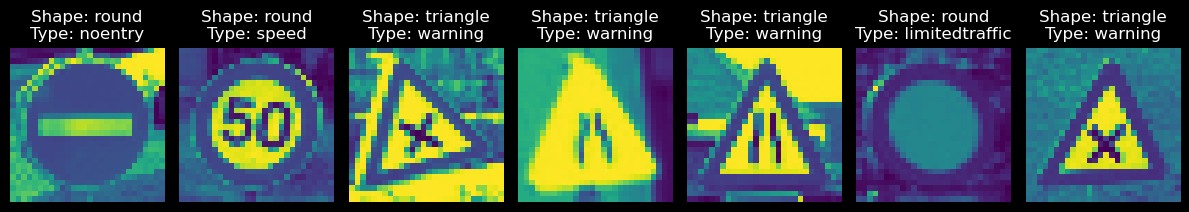

In [7]:
# Display a few randomly selected images with their labels
num_images = 7
random_indices = df.index.to_series().sample(num_images)

fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

for i, idx in enumerate(random_indices):
    image_path = df.loc[idx, 'image_path']
    shape_label = shape_encoder.inverse_transform([df.loc[idx, 'shape_label']])[0]
    type_label = type_encoder.inverse_transform([df.loc[idx, 'type_label']])[0]
    
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Shape: {shape_label}\nType: {type_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Check if there are any duplicated rows in the DataFrame
has_duplicates = df.duplicated().any()

# Print out the result
print(f"DuplicateData: {has_duplicates}")

DuplicateData: False


Number of images in the training set: 2959
Number of images in the validation set: 740


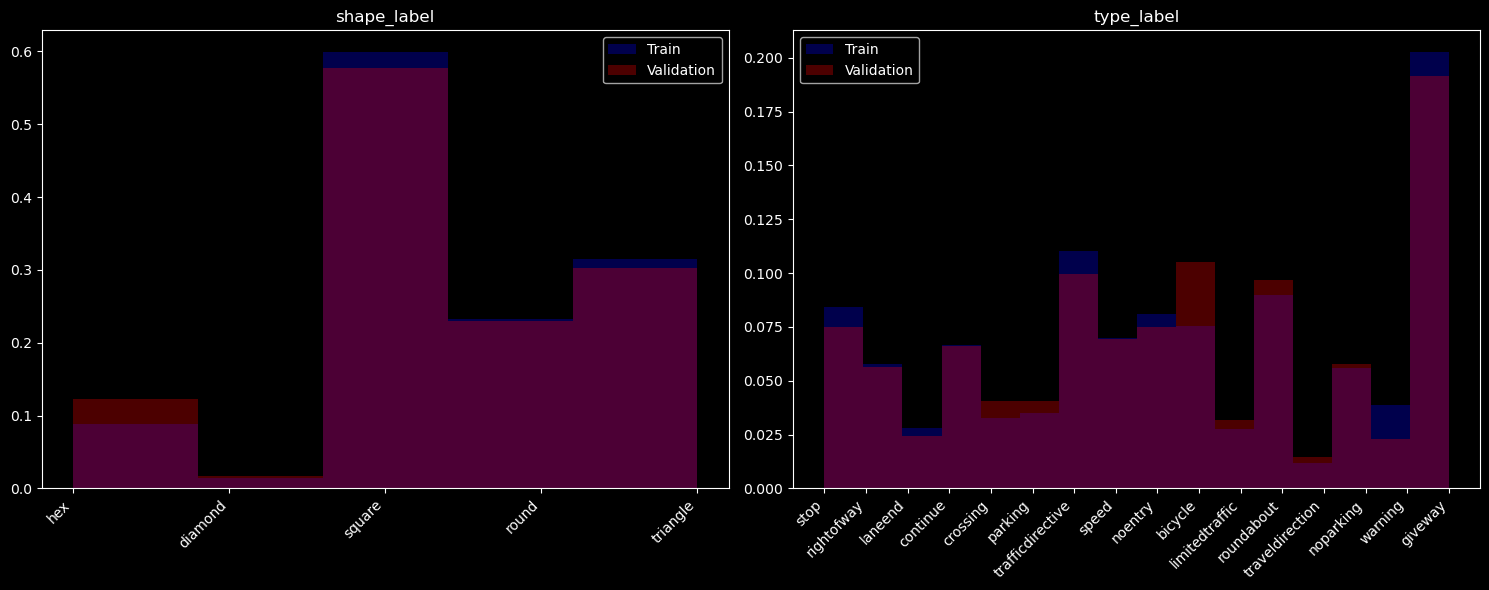

In [29]:
import matplotlib.pyplot as plt

# Split the data into train and validation sets
train_indices, val_indices = train_test_split(df.index, test_size=0.2, random_state=42)

# Print the number of items in each dataset
print("Number of images in the training set:", len(train_indices))
print("Number of images in the validation set:", len(val_indices))

# Create data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Get the unique labels for each column
shape_labels = shape_encoder.inverse_transform(df['shape_label'].unique())
type_labels = type_encoder.inverse_transform(df['type_label'].unique())

# Create a grid of subplots
plt.figure(figsize=(15, 6))
for i, col in enumerate(['shape_label', 'type_label']):
    plt.subplot(1, 2, i+1)
    if col == 'shape_label':
        unique_values = shape_labels
    else:
        unique_values = type_labels

    plt.hist(df.loc[train_indices, col], alpha=0.3, color='b', density=True,
             bins=len(unique_values), label='Train')
    plt.hist(df.loc[val_indices, col], alpha=0.3, color='r', density=True,
             bins=len(unique_values), label='Validation')
    plt.title(col)
    plt.xticks(range(len(unique_values)), unique_values, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

plt.show()

In [10]:
# Load and preprocess the image data
def load_and_preprocess_image(image_path):
    img = imageio.imread(image_path)
    img = img / 255.0
    return img.flatten()

# Prepare the input data and labels
X_train = np.array([load_and_preprocess_image(image_path) for image_path in df.iloc[train_indices]['image_path']])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in df.iloc[val_indices]['image_path']])

y_train_shape = df.iloc[train_indices]['shape_label'].values
y_train_type = df.iloc[train_indices]['type_label'].values
y_val_shape = df.iloc[val_indices]['shape_label'].values
y_val_type = df.iloc[val_indices]['type_label'].values

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Random Forest</h1>

Shape Accuracy: 0.9540540540540541
Type Accuracy: 0.9554054054054054


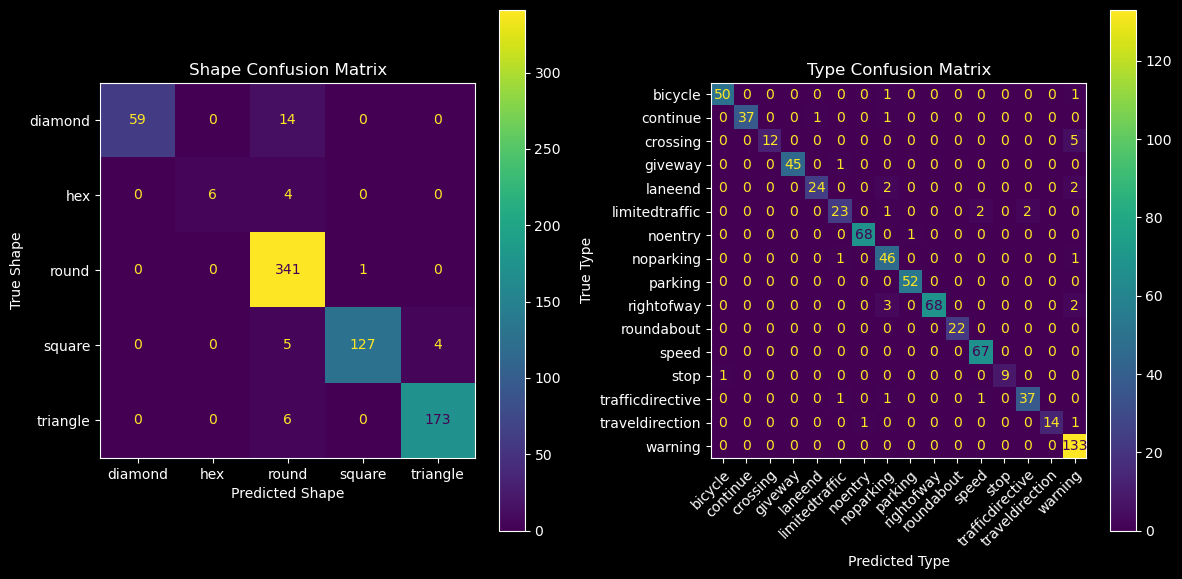

In [11]:
# Create Random Forest classifiers for shape and type
shape_rf = RandomForestClassifier(n_estimators=100, random_state=42)
type_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifiers
shape_rf.fit(X_train, y_train_shape)
type_rf.fit(X_train, y_train_type)

# Make predictions on the validation set
shape_pred = shape_rf.predict(X_val)
type_pred = type_rf.predict(X_val)

# Evaluate the Random Forest classifiers on the validation set
shape_acc = shape_rf.score(X_val, y_val_shape)
type_acc = type_rf.score(X_val, y_val_type)

print("Shape Accuracy:", shape_acc)
print("Type Accuracy:", type_acc)

# Create confusion matrices
shape_cm = confusion_matrix(y_val_shape, shape_pred)
type_cm = confusion_matrix(y_val_type, type_pred)

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Ensemble</h1>

Shape Accuracy: 0.9540540540540541
Type Accuracy: 0.9567567567567568


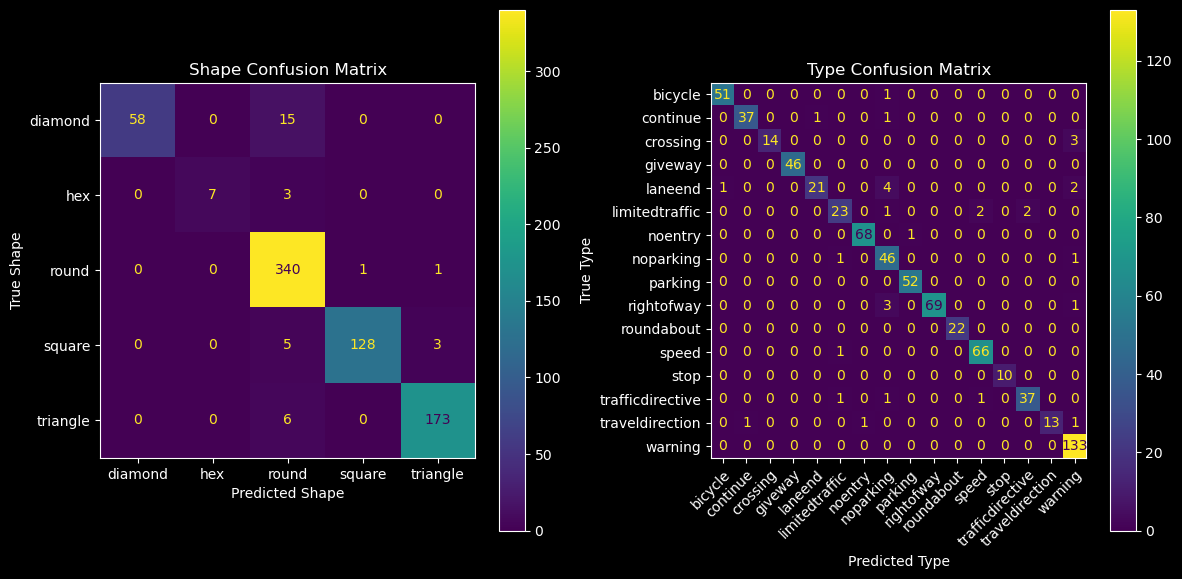

In [12]:
from sklearn.ensemble import VotingClassifier

# Create Random Forest classifiers for shape and type
shape_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
shape_rf2 = RandomForestClassifier(n_estimators=100, random_state=43)
shape_rf3 = RandomForestClassifier(n_estimators=100, random_state=44)

type_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
type_rf2 = RandomForestClassifier(n_estimators=100, random_state=43)
type_rf3 = RandomForestClassifier(n_estimators=100, random_state=44)

# Create the ensemble classifiers
shape_ensemble = VotingClassifier(estimators=[('rf1', shape_rf1), ('rf2', shape_rf2), ('rf3', shape_rf3)], voting='hard')
type_ensemble = VotingClassifier(estimators=[('rf1', type_rf1), ('rf2', type_rf2), ('rf3', type_rf3)], voting='hard')

# Train the ensemble classifiers
shape_ensemble.fit(X_train, y_train_shape)
type_ensemble.fit(X_train, y_train_type)

# Make predictions on the validation set
shape_pred = shape_ensemble.predict(X_val)
type_pred = type_ensemble.predict(X_val)

# Evaluate the ensemble classifiers on the validation set
shape_acc = shape_ensemble.score(X_val, y_val_shape)
type_acc = type_ensemble.score(X_val, y_val_type)

print("Shape Accuracy:", shape_acc)
print("Type Accuracy:", type_acc)

# Create confusion matrices
shape_cm = confusion_matrix(y_val_shape, shape_pred)
type_cm = confusion_matrix(y_val_type, type_pred)

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Neural Networks</h1>

In [20]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df.iloc[train_indices],
    x_col='image_path',
    y_col=['shape_label', 'type_label'],
    target_size=img_size,
    batch_size=32,
    class_mode='multi_output'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df.iloc[val_indices],
    x_col='image_path',
    y_col=['shape_label', 'type_label'],
    target_size=img_size,
    batch_size=32,
    class_mode='multi_output'
)

# Create a custom CNN model
input_shape = (28, 28, 3)
input_tensor = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

shape_output = Dense(len(shape_encoder.classes_), activation='softmax', name='shape')(x)
type_output = Dense(len(type_encoder.classes_), activation='softmax', name='type')(x)

model = Model(inputs=input_tensor, outputs=[shape_output, type_output])

# Compile the model
model.compile(optimizer='adam', loss={'shape': 'sparse_categorical_crossentropy', 'type': 'sparse_categorical_crossentropy'}, metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_indices) // 32,
    validation_data=val_generator,
    validation_steps=len(val_indices) // 32,
    epochs=10
)

Found 2959 validated image filenames.
Found 740 validated image filenames.
Epoch 1/10


2024-04-27 13:33:32.267620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/92 [============================>.] - ETA: 0s - loss: 3.5201 - shape_loss: 1.1565 - type_loss: 2.3636 - shape_accuracy: 0.5630 - type_accuracy: 0.2363

2024-04-27 13:33:42.428442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 11s 111ms/step - loss: 3.5138 - shape_loss: 1.1542 - type_loss: 2.3596 - shape_accuracy: 0.5641 - type_accuracy: 0.2374 - val_loss: 2.3175 - val_shape_loss: 0.7100 - val_type_loss: 1.6075 - val_shape_accuracy: 0.7378 - val_type_accuracy: 0.5883
Epoch 2/10
92/92 [==============================] - 12s 131ms/step - loss: 2.0561 - shape_loss: 0.6406 - type_loss: 1.4155 - shape_accuracy: 0.7708 - type_accuracy: 0.5518 - val_loss: 1.0322 - val_shape_loss: 0.3124 - val_type_loss: 0.7198 - val_shape_accuracy: 0.9103 - val_type_accuracy: 0.8084
Epoch 3/10
92/92 [==============================] - 12s 133ms/step - loss: 1.3021 - shape_loss: 0.4033 - type_loss: 0.8988 - shape_accuracy: 0.8606 - type_accuracy: 0.7041 - val_loss: 0.6603 - val_shape_loss: 0.1661 - val_type_loss: 0.4942 - val_shape_accuracy: 0.9484 - val_type_accuracy: 0.8614
Epoch 4/10
92/92 [==============================] - 10s 110ms/step - loss: 0.9155 - shape_loss: 0.2514 - type_loss: 0.66

 6/24 [======>.......................] - ETA: 0s

2024-04-27 13:37:10.220845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 0s 19ms/step


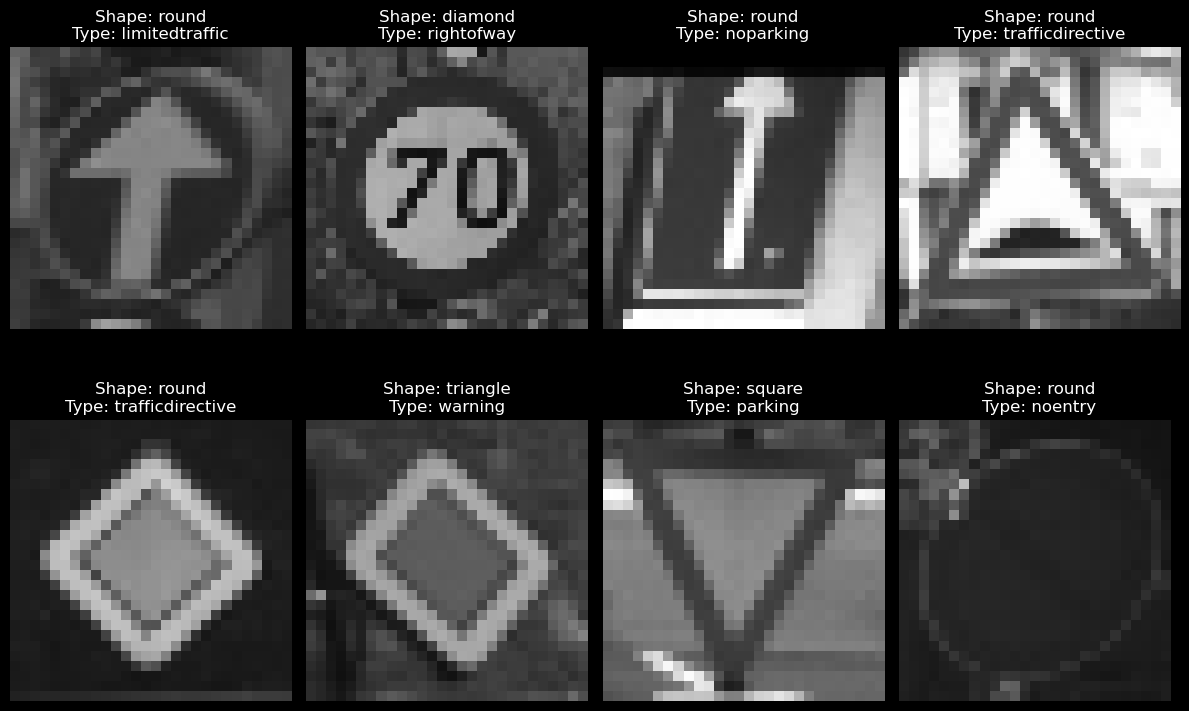

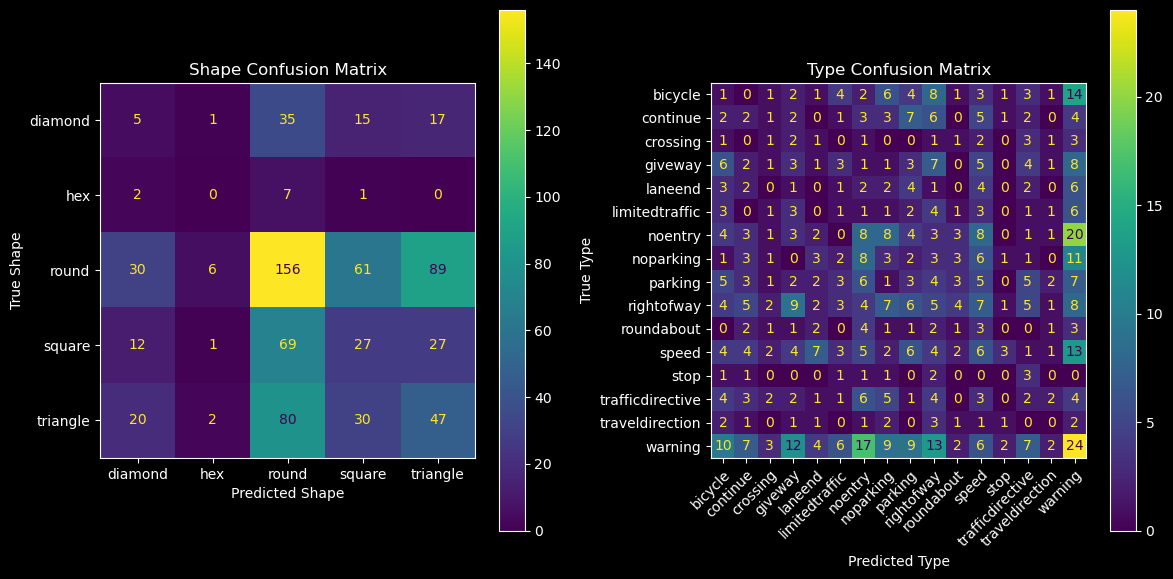

In [22]:
# Generate predictions on the validation set
val_preds = model.predict(val_generator)

# Get the predicted labels for shape and type
shape_preds = np.argmax(val_preds[0], axis=1)
type_preds = np.argmax(val_preds[1], axis=1)

# Get the true labels for shape and type from the validation generator
val_labels = val_generator.labels
shape_labels = val_labels[0]
type_labels = val_labels[1]

# Create a dictionary to map the encoded labels back to their original names
shape_labels_map = {i: label for i, label in enumerate(shape_encoder.classes_)}
type_labels_map = {i: label for i, label in enumerate(type_encoder.classes_)}

# Visualize some predicted images
plt.figure(figsize=(12, 8))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    image = val_generator[i][0][0]
    image = (image * 255).astype('uint8')  # Convert the image back to the range [0, 255]
    plt.imshow(image)
    plt.title(f"Shape: {shape_labels_map[shape_preds[i]]}\nType: {type_labels_map[type_preds[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Create confusion matrices for shape and type
shape_cm = confusion_matrix(shape_labels, shape_preds)
type_cm = confusion_matrix(type_labels, type_preds)

# Plot the confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for shape
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

# Plot confusion matrix for type
ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

1/1 [==============================] - 0s 53ms/step
Predicted Shape: diamond
Predicted Type: bicycle


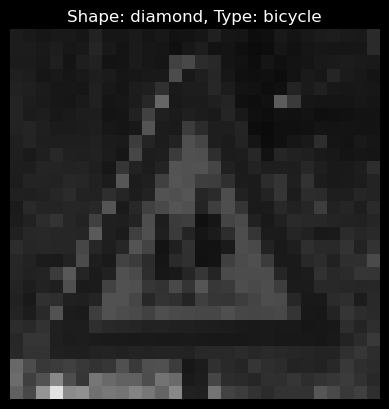

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Select a random image path from the validation set
random_index = np.random.choice(val_indices)
image_path = df.iloc[random_index]['image_path']

# Load and preprocess the image
img = image.load_img(image_path, target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
shape_pred, type_pred = model.predict(x)

# Get the predicted shape and type labels
shape_label = shape_encoder.inverse_transform([np.argmax(shape_pred)])[0]
type_label = type_encoder.inverse_transform([np.argmax(type_pred)])[0]

# Print the predicted shape and type
print("Predicted Shape:", shape_label)
print("Predicted Type:", type_label)

# Display the tested image
plt.imshow(img)
plt.axis('off')
plt.title(f"Shape: {shape_label}, Type: {type_label}")
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the validation set
val_preds = model.predict(val_generator)

# Get the predicted labels for shape and type
shape_preds = np.argmax(val_preds[0], axis=1)
type_preds = np.argmax(val_preds[1], axis=1)

# Get the true labels for shape and type from the validation generator
val_labels = val_generator.labels
shape_labels = val_labels[:, 0]
type_labels = val_labels[:, 1]

# Create a dictionary to map the encoded labels back to their original names
shape_labels_map = {i: label for i, label in enumerate(shape_encoder.classes_)}
type_labels_map = {i: label for i, label in enumerate(type_encoder.classes_)}

# Visualize some predicted images
plt.figure(figsize=(12, 8))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    image = val_generator[i][0][0]
    image = (image * 255).astype('uint8')  # Convert the image back to the range [0, 255]
    plt.imshow(image)
    plt.title(f"Shape: {shape_labels_map[shape_preds[i]]}\nType: {type_labels_map[type_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Create confusion matrices for shape and type
shape_cm = confusion_matrix(shape_labels, shape_preds)
type_cm = confusion_matrix(type_labels, type_preds)

# Plot the confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for shape
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

# Plot confusion matrix for type
ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

 9/24 [==========>...................] - ETA: 0s

2024-04-27 12:55:07.917700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 0s 17ms/step


TypeError: list indices must be integers or slices, not tuple

In [30]:
# Evaluate the model on the validation set
val_loss, val_shape_loss, val_type_loss, val_shape_acc, val_type_acc = model.evaluate(val_generator, steps=len(val_indices) // 32)

# Print the validation metrics
print("Validation Loss:", val_loss)
print("Validation Shape Loss:", val_shape_loss)
print("Validation Type Loss:", val_type_loss)
print("Validation Shape Accuracy:", val_shape_acc)
print("Validation Type Accuracy:", val_type_acc)

 8/23 [=========>....................] - ETA: 0s - loss: 0.0192 - shape_output_loss: 0.0055 - type_output_loss: 0.0137 - shape_output_accuracy: 0.9961 - type_output_accuracy: 0.9961   

2024-04-27 12:55:13.589981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 0s 16ms/step - loss: 0.0131 - shape_output_loss: 0.0039 - type_output_loss: 0.0092 - shape_output_accuracy: 0.9973 - type_output_accuracy: 0.9973
Validation Loss: 0.013112837448716164
Validation Shape Loss: 0.003938059322535992
Validation Type Loss: 0.009174778126180172
Validation Shape Accuracy: 0.9972826242446899
Validation Type Accuracy: 0.9972826242446899


<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Independent Evaluation</h1>

In [ ]:
-BEST IDEA IS TO GATHER INCORRECT, AND CORRECT DATA TO TEST.
we used both the german sister dataset, and collected 200 of my own images
